In [1]:
# Import Dependencies
import json
import pandas as pd
import numpy as np
import time
import datetime as dt

# Import Python module for regular expressions.
import re

# Create the database engine that will allow Pandas to communicate with our 
# SQL server.
from sqlalchemy import create_engine

In [2]:
file_dir = 'C:/Users/angel/DataAnalytics/Class/Unit_Assessment_Databases/'

In [3]:
l_stops = pd.read_csv(f'{file_dir}CTA_-_System_Information_-_List_of__L__Stops.csv', low_memory=False)
ridership = pd.read_csv(f'{file_dir}CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv', low_memory=False)


In [4]:
l_stops_df = pd.DataFrame(l_stops)
ridership_df = pd.DataFrame(ridership)

In [5]:
station_bools = l_stops_df[['MAP_ID','ADA','RED','BLUE','G','BRN','P','Pexp','Y','Pnk','O']
].groupby('MAP_ID').any()

l_stops_df = l_stops_df.drop(['STOP_ID', 'DIRECTION_ID', 'STOP_NAME',
'ADA','RED','BLUE','G','BRN','P','Pexp','Y','Pnk','O'], axis=1) \
    .merge(station_bools, how='left', left_on='MAP_ID',
right_index=True).drop_duplicates()

In [6]:
l_stops_df

,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,Location,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O
0,18th,18th (Pink Line),40830,"(41.857908, -87.669147)",True,False,False,False,False,False,False,False,True,False
2,35th/Archer,35th/Archer (Orange Line),40120,"(41.829353, -87.680622)",True,False,False,False,False,False,False,False,False,True
4,35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,"(41.831677, -87.625826)",True,False,False,True,False,False,False,False,False,False
6,43rd,43rd (Green Line),41270,"(41.816462, -87.619021)",True,False,False,True,False,False,False,False,False,False
8,51st,51st (Green Line),40130,"(41.80209, -87.618487)",True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,Cermak-McCormick Place,Cermak-McCormick Place (Green Line),41690,"(41.853115, -87.626402)",True,False,False,True,False,False,False,False,False,False
289,Wilson,Wilson (Red & Purple Lines),40540,"(41.964273, -87.657588)",True,True,False,False,False,False,True,False,False,False
290,Addison,Addison (Blue Line),41240,"(41.94738, -87.71906)",True,False,True,False,False,False,False,False,False,False
292,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...",41700,"(41.88322, -87.626189)",True,False,False,True,True,False,True,False,True,True


In [7]:
l_stops_df[['latitude','longitude']] = l_stops_df['Location'].str.replace('\(|\)','', regex=True).str.split(',',expand=True).apply(pd.to_numeric)

In [8]:
l_stops_df

,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,Location,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,latitude,longitude
0,18th,18th (Pink Line),40830,"(41.857908, -87.669147)",True,False,False,False,False,False,False,False,True,False,41.857908,-87.669147
2,35th/Archer,35th/Archer (Orange Line),40120,"(41.829353, -87.680622)",True,False,False,False,False,False,False,False,False,True,41.829353,-87.680622
4,35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,"(41.831677, -87.625826)",True,False,False,True,False,False,False,False,False,False,41.831677,-87.625826
6,43rd,43rd (Green Line),41270,"(41.816462, -87.619021)",True,False,False,True,False,False,False,False,False,False,41.816462,-87.619021
8,51st,51st (Green Line),40130,"(41.80209, -87.618487)",True,False,False,True,False,False,False,False,False,False,41.802090,-87.618487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,Cermak-McCormick Place,Cermak-McCormick Place (Green Line),41690,"(41.853115, -87.626402)",True,False,False,True,False,False,False,False,False,False,41.853115,-87.626402
289,Wilson,Wilson (Red & Purple Lines),40540,"(41.964273, -87.657588)",True,True,False,False,False,False,True,False,False,False,41.964273,-87.657588
290,Addison,Addison (Blue Line),41240,"(41.94738, -87.71906)",True,False,True,False,False,False,False,False,False,False,41.947380,-87.719060
292,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...",41700,"(41.88322, -87.626189)",True,False,False,True,True,False,True,False,True,True,41.883220,-87.626189


In [9]:
df = pd.merge(ridership_df, l_stops_df, how='left', left_on='station_id', right_on='MAP_ID')

In [10]:
df

,station_id,stationname,date,daytype,rides,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,Location,ADA,...,BLUE,G,BRN,P,Pexp,Y,Pnk,O,latitude,longitude
0,40850,Library,10/09/2004,A,1057,Harold Washington Library-State/Van Buren,Harold Washington Library-State/Van Buren (Bro...,40850.0,"(41.876862, -87.628196)",True,...,False,False,True,False,True,False,True,True,41.876862,-87.628196
1,40780,Central Park,06/18/2010,W,1154,Central Park,Central Park (Pink Line),40780.0,"(41.853839, -87.714842)",True,...,False,False,False,False,False,False,True,False,41.853839,-87.714842
2,41500,Montrose-Brown,10/30/2001,W,2116,Montrose,Montrose (Brown Line),41500.0,"(41.961756, -87.675047)",True,...,False,False,True,False,False,False,False,False,41.961756,-87.675047
3,40500,Washington/State,10/26/2006,W,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41090,Monroe/State,07/07/2010,W,9431,Monroe,Monroe (Red Line),41090.0,"(41.880745, -87.627696)",False,...,False,False,False,False,False,False,False,False,41.880745,-87.627696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027326,41700,Washington/Wabash,04/26/2020,U,419,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...",41700.0,"(41.88322, -87.626189)",True,...,False,True,True,False,True,False,True,True,41.883220,-87.626189
1027327,41700,Washington/Wabash,04/27/2020,W,883,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...",41700.0,"(41.88322, -87.626189)",True,...,False,True,True,False,True,False,True,True,41.883220,-87.626189
1027328,41700,Washington/Wabash,04/28/2020,W,880,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...",41700.0,"(41.88322, -87.626189)",True,...,False,True,True,False,True,False,True,True,41.883220,-87.626189
1027329,41700,Washington/Wabash,04/29/2020,W,768,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...",41700.0,"(41.88322, -87.626189)",True,...,False,True,True,False,True,False,True,True,41.883220,-87.626189


In [11]:
df['south_side'] = df['latitude'] < 41.881
df[['south_side','rides']].groupby('south_side').mean()

,rides
south_side,
False,3688.608044
True,2987.067489


In [13]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,station_id,stationname,date,daytype,rides,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,Location,ADA,...,BRN,P,Pexp,Y,Pnk,O,latitude,longitude,south_side,year
0,40850,Library,10/09/2004,A,1057,Harold Washington Library-State/Van Buren,Harold Washington Library-State/Van Buren (Bro...,40850.0,"(41.876862, -87.628196)",True,...,True,False,True,False,True,True,41.876862,-87.628196,True,2004
1,40780,Central Park,06/18/2010,W,1154,Central Park,Central Park (Pink Line),40780.0,"(41.853839, -87.714842)",True,...,False,False,False,False,True,False,41.853839,-87.714842,True,2010
2,41500,Montrose-Brown,10/30/2001,W,2116,Montrose,Montrose (Brown Line),41500.0,"(41.961756, -87.675047)",True,...,True,False,False,False,False,False,41.961756,-87.675047,False,2001
3,40500,Washington/State,10/26/2006,W,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2006
4,41090,Monroe/State,07/07/2010,W,9431,Monroe,Monroe (Red Line),41090.0,"(41.880745, -87.627696)",False,...,False,False,False,False,False,False,41.880745,-87.627696,True,2010


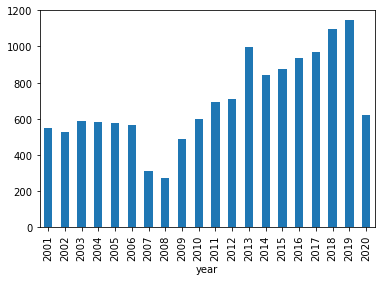

In [14]:
rides_by_sides = df[['year','south_side','rides']] \
    .groupby(['year','south_side']).mean() \
    .reset_index() \
    .pivot(index='year',columns='south_side',values='rides')
rides_by_sides.columns = ['north','south']
(rides_by_sides['north'] - rides_by_sides['south']).plot(kind='bar')